In [1]:
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%autoreload 2

import _utils as utils

<IPython.core.display.Javascript object>

In [2]:
df = utils.read_data('results')

In [3]:
df.scenario.unique()

array(['CEDS', 'SSP2-45-SPA2-V25', 'SSP2-45-SPA2-V25-no',
       'SSP2-Ref-SPA0-V25', 'SSP2-Ref-SPA0-V25-no'], dtype=object)

In [4]:
ceds = df.scenario == 'CEDS'
noover = df.scenario.str.contains('no')
ref = df.scenario.str.contains('Ref')
x = df[(ceds | ref) & ~noover]
y = df[(ceds | ~ref) & ~noover]

In [5]:
x.tail()

,region,model,scenario,ind,year,value,ssp,kind
618070,World,MESSAGE-GLOBIOM,SSP2-Ref-SPA0-V25,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2060,0.713726,SSP2,Ref
618073,World,MESSAGE-GLOBIOM,SSP2-Ref-SPA0-V25,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2070,0.534029,SSP2,Ref
618076,World,MESSAGE-GLOBIOM,SSP2-Ref-SPA0-V25,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2080,0.402826,SSP2,Ref
618079,World,MESSAGE-GLOBIOM,SSP2-Ref-SPA0-V25,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2090,0.304602,SSP2,Ref
618082,World,MESSAGE-GLOBIOM,SSP2-Ref-SPA0-V25,CEDS+|9+ Sectors|Emissions|VOC|Waste|Unharmonized,2100,0.231246,SSP2,Ref


In [6]:
def example_results_plot(x, y, gas, sector, regions=None):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs = axs.ravel()
    regions = regions or '5_regions'
    
    regions = ['CPA', 'PAS', 'SAS']
    utils.plot_lines(x, ax=axs[0], gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=True)
    axs[0].set_title('Harmonized 11-Region Emissions')
    regions = ['R5ASIA']
    utils.plot_lines(x, ax=axs[2], gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=True)
    axs[2].set_title('Aggregated 5-Region Emissions')
    
    regions = ['CPA', 'PAS', 'SAS']
    utils.plot_lines(y, ax=axs[1], gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=True)
    axs[1].set_title('Harmonized 11-Region Emissions')
    regions = ['R5ASIA']
    utils.plot_lines(y, ax=axs[3], gas=gas, sector=sector, regions=regions, world=False, 
                     unharmonized=True, legend=True, hline=False, colorby='region',
                    fillstyle='full', label_markers=True)
    axs[3].set_title('Aggregated 5-Region Emissions')

    
    for ax, letter in zip(axs, ['a', 'b', 'c', 'd']):
        ax.text(-0.15, 1.01, letter, transform=ax.transAxes, fontsize=16, fontweight='bold')
        if letter in ['a', 'b']:
            ax.set_ylabel('Mt {}/yr'.format(gas))
        ax.set_ylim([0, None])
    #fig.suptitle('{} emissions in the {}'.format(gas, sector))
    
#    plt.text(0, 0, 'SSP2-Reference', rotation=90)
    
    plt.tight_layout()
    plt.savefig('../figs/example_{}_{}.pdf'.format(gas, sector).replace(' ', '_'))

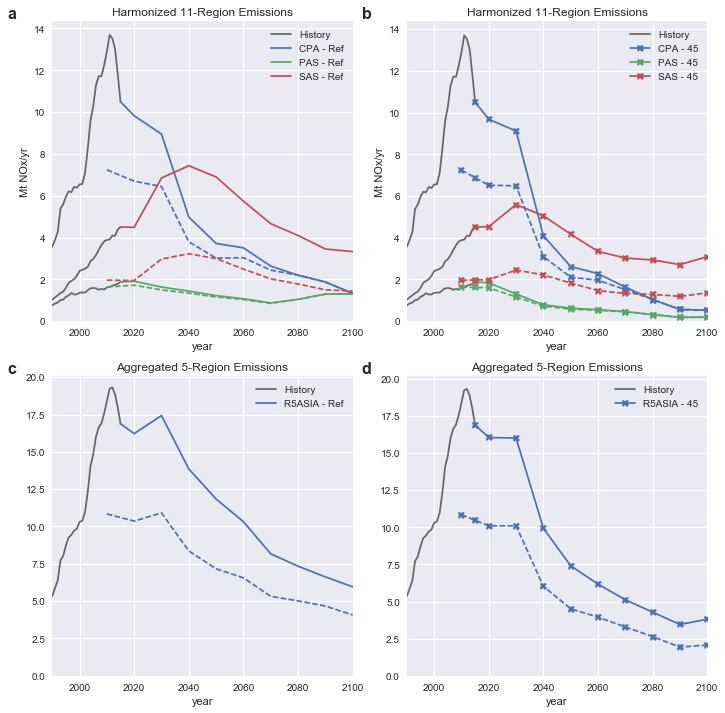

In [7]:
gas = 'NOx'
sector = 'Energy Sector'
example_results_plot(x, y, gas, sector)